In [1]:
from datetime import date, datetime, timedelta
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19_DTM.data.mobility import * # contains all necessary functions
from covid19_DTM.visualization.output import *
from covid19_DTM.data.sciensano import get_sciensano_COVID19_data_spatial, get_sciensano_COVID19_data

In [2]:
from covid19_DTM.visualization.utils import moving_avg
df_hosp, df_mort, df_cases, df_vacc = get_sciensano_COVID19_data(update=False)
sciensano_df_public = moving_avg(df_hosp[['H_in']].groupby('date').sum(), dropna=True)
sciensano_values_public = sciensano_df_public.values
sciensano_dates_public = sciensano_df_public.index + pd.Timedelta(hours=12)

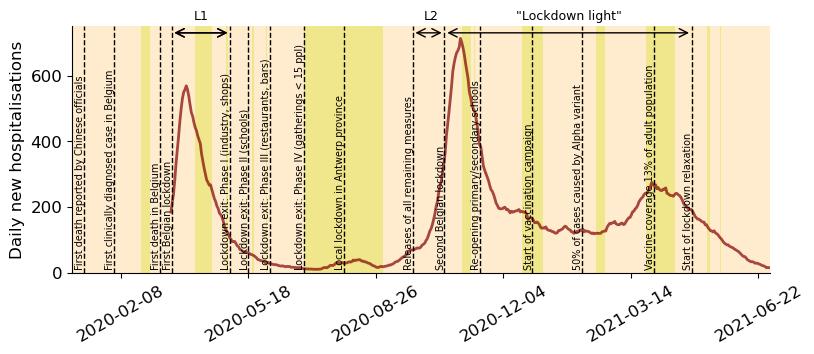

In [59]:
############################
# Copied from timeline.pdf #
############################

show_lockdown = True
show_waves = False

t1 = pd.Timestamp(2020, 1, 10, 0, 0) # First death in China
t1_name = 'First death reported by Chinese officials'
t2 = pd.Timestamp(2020, 2, 3, 0, 0) # First case in BE
t2_name = 'First clinically diagnosed case in Belgium'
t3 = pd.Timestamp(2020, 3, 10, 0, 0) # First death in BE. Two more follow day after.
t3_name = 'First death in Belgium'
t4 = pd.Timestamp(2020, 3, 19, 0, 0) # Begin lockdown
t4_name = 'First Belgian lockdown'
t5 = pd.Timestamp(2020, 5, 4, 0, 0) #
t5_name = 'Lockdown exit: Phase I (industry, shops)'
t6 = pd.Timestamp(2020, 5, 18, 0, 0) #
t6_name = 'Lockdown exit: Phase II (schools)'
t7 = pd.Timestamp(2020, 6, 4, 0, 0) #
t7_name = 'Lockdown exit: Phase III (restaurants, bars)'
t8 = pd.Timestamp(2020, 7, 1, 0, 0)
t8_name = 'Lockdown exit: Phase IV (gatherings < 15 ppl)'
t9 = pd.Timestamp(2020, 8, 1, 0, 0)
t9_name = 'Local lockdown in Antwerp province'
t10 = pd.Timestamp(2020, 9, 24, 0, 0)
t10_name = 'Releases of all remaining measures'
t11 = pd.Timestamp(2020, 10, 19, 0, 0)
t11_name = 'Second Belgian lockdown'
t12 = pd.Timestamp(2020, 11, 16, 0, 0)
t12_name = 'Re-opening primary/secondary schools'
t13 = pd.Timestamp(2020, 12, 27, 0, 0)
t13_name = 'Start of vaccination campaign'
t14 = pd.Timestamp(2021, 2, 4, 0, 0)
t14_name = '50% of cases caused by Alpha variant'
t15 = pd.Timestamp(2021, 4, 1, 0, 0)
t15_name = 'Vaccine coverage 13% of adult population'
t16 = pd.Timestamp(2021, 5, 1, 0, 0)
t16_name = 'Start of lockdown relaxation'

start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2021, 7, 1, 0, 0)
fig, ax = plt.subplots(figsize=(9,3.2))
ax.grid(False)
ticklabelsize = 12
ax.set_xlim(start_date, end_date)
ylim=750
ax.set_ylim(0, ylim)
# Overlay hospitalisations
ax.grid(False)
ax.set_ylabel('Daily new hospitalisations', size=ticklabelsize)
plt.setp(ax.get_xticklabels(), fontsize=ticklabelsize)
# ax.plot(sciensano_dates, sciensano_values, linewidth=2, color='maroon', alpha=0.7)
ax.plot(sciensano_dates_public, sciensano_values_public, linewidth=2, color='maroon', alpha=0.7)
plt.setp(ax.get_yticklabels(), fontsize=ticklabelsize)

week_color='blanchedalmond'#'white'
weekend_color='blanchedalmond'#'lightgrey'
vacation_color='khaki'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)
# ax.set_title('test', size=14)

# Add arrows denoting lockdown periods
if show_lockdown:
    label_lockdown_size = 9
    label_lockdown_move_up = 20
    arrow_height = ylim -20
    # First lockdown
    ax.annotate(text='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
                arrowprops=dict(arrowstyle='<->'))#, ls='dashed'))
    label_lockdown1_move_right = 17 # days
    ax.text(t4 + pd.Timedelta(days=label_lockdown1_move_right), \
             ylim + label_lockdown_move_up, 'L1', size=label_lockdown_size)
    ax.annotate(text='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
                arrowprops=dict(arrowstyle='<->'))#, ls='dashed'))
    # Second lockdown
    label_lockdown1_move_right = 9 # days
    ax.text(t11 + pd.Timedelta(days=label_lockdown1_move_right), \
            ylim + label_lockdown_move_up, 'L2', size=label_lockdown_size)
    ax.annotate(text='', xy=(t11, arrow_height), xytext=(t11,arrow_height), \
                arrowprops=dict(arrowstyle='<->'))#, ls='dashed'))
    # Lockdown light
    label_lockdown1_move_right = 56 # days
    ax.text(t11 + pd.Timedelta(days=label_lockdown1_move_right), \
            ylim + label_lockdown_move_up, '"Lockdown light"', size=label_lockdown_size)
    ax.annotate(text='', xy=(t11, arrow_height), xytext=(t16,arrow_height), \
                arrowprops=dict(arrowstyle='<->'))#, ls='dashed'))

# ax.annotate(text='', xy=(start_calibration_wave2,arrow_height), xytext=(end_calibration_wave2,arrow_height), \
#             arrowprops=dict(arrowstyle='<->'))
# label_cal2_move_right = 41 # days
# ax.text(start_calibration_wave2 + pd.Timedelta(days=label_cal2_move_right), \
#         ymax + label_cal_move_up, 'calibration wave 2', size=label_cal_size)

# Add vertically dashed lines
linestyle='--'
color='k'
linewidth=1
label_size = 7
label_height = 15
label_move_left = 7 #5.5 # days

# wave 1
ax.axvline(t1, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t1-pd.Timedelta(days=label_move_left), label_height, t1_name, rotation=90, size=label_size)

ax.axvline(t2, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t2-pd.Timedelta(days=label_move_left), label_height, t2_name, rotation=90, size=label_size)

ax.axvline(t3, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t3-pd.Timedelta(days=label_move_left), label_height, t3_name, rotation=90, size=label_size)

ax.axvline(t4, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t4-pd.Timedelta(days=label_move_left), label_height, t4_name, rotation=90, size=label_size)

ax.axvline(t5, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t5-pd.Timedelta(days=label_move_left), label_height, t5_name, rotation=90, size=label_size)

ax.axvline(t6, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t6-pd.Timedelta(days=label_move_left), label_height, t6_name, rotation=90, size=label_size)

ax.axvline(t7, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t7-pd.Timedelta(days=label_move_left), label_height, t7_name, rotation=90, size=label_size)

ax.axvline(t8, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t8-pd.Timedelta(days=label_move_left), label_height, t8_name, rotation=90, size=label_size)

ax.axvline(t9, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t9-pd.Timedelta(days=label_move_left), label_height, t9_name, rotation=90, size=label_size)

ax.axvline(t10, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t10-pd.Timedelta(days=label_move_left), label_height, t10_name, rotation=90, size=label_size)

ax.axvline(t11, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t11-pd.Timedelta(days=label_move_left), label_height, t11_name, rotation=90, size=label_size)

ax.axvline(t12, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t12-pd.Timedelta(days=label_move_left), label_height, t12_name, rotation=90, size=label_size)

ax.axvline(t13, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t13-pd.Timedelta(days=label_move_left), label_height, t13_name, rotation=90, size=label_size)

ax.axvline(t14, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t14-pd.Timedelta(days=label_move_left), label_height, t14_name, rotation=90, size=label_size)

ax.axvline(t15, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t15-pd.Timedelta(days=label_move_left), label_height, t15_name, rotation=90, size=label_size)

ax.axvline(t16, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t16-pd.Timedelta(days=label_move_left), label_height, t16_name, rotation=90, size=label_size)

ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.xticks(rotation = 30)

plt.savefig('timeline.pdf', dpi=400, bbox_inches='tight')